# Bike Sharing Assignment

# Project by Irfan Khan Mohammed

# Using Multiple Linear Regression

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American maraluations important!**

## Business Goal:
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. some factors.

** So interpretation is important!**

Step 1: Reading and Understanding the Data

Step 2: Visualizing the Data

Step 3: Data Preparation

Step 4: Splitting the Data into Training and Testing Sets

Step 5: Building a linear model

Step 6: Residual Analysis of the train data

Step 7: Making Predictions Using the Final Model

Step 8: Model Evaluation

Step 9: Conclusion

## Step 1: Reading and Understanding the Data
1. Let us first all the libraries relevant for this assignment.
2. Understing the structure of the data.
3. Supress Warnings.

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import of required libs
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
df1 = pd.read_csv("day.csv")

In [11]:
# Check the head of the dataset
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the various aspects of the bike dataframe named as df1

In [14]:
# Checking the shape of the dataframe
df1.shape

(730, 16)

In [16]:
#Validating the decribe of the dataframe df1
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [18]:
#Validating the Info of the dataframe df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [20]:
#checking for null values in the dataset
(df1.isnull().mean()*100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### No missing values in the dataset

In [23]:
#Renaming the columns with short names with full name
df1.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'Rentals'}, inplace = True) 
df1.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Rentals
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
#Mapping variables season, month, weathersit, weekday

df1['season']=df1.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df1['month']=df1.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df1['weathersit']=df1.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df1['weekday']=df1.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df1.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Rentals
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Identifying Continuous and Categorical Features

In [29]:
#Checking the unique values in the data
df1.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
Rentals       695
instant       730
dteday        730
dtype: int64

In [31]:
#Validating the Info of the dataframe df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   Year        730 non-null    int64  
 4   month       730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  Rentals     730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

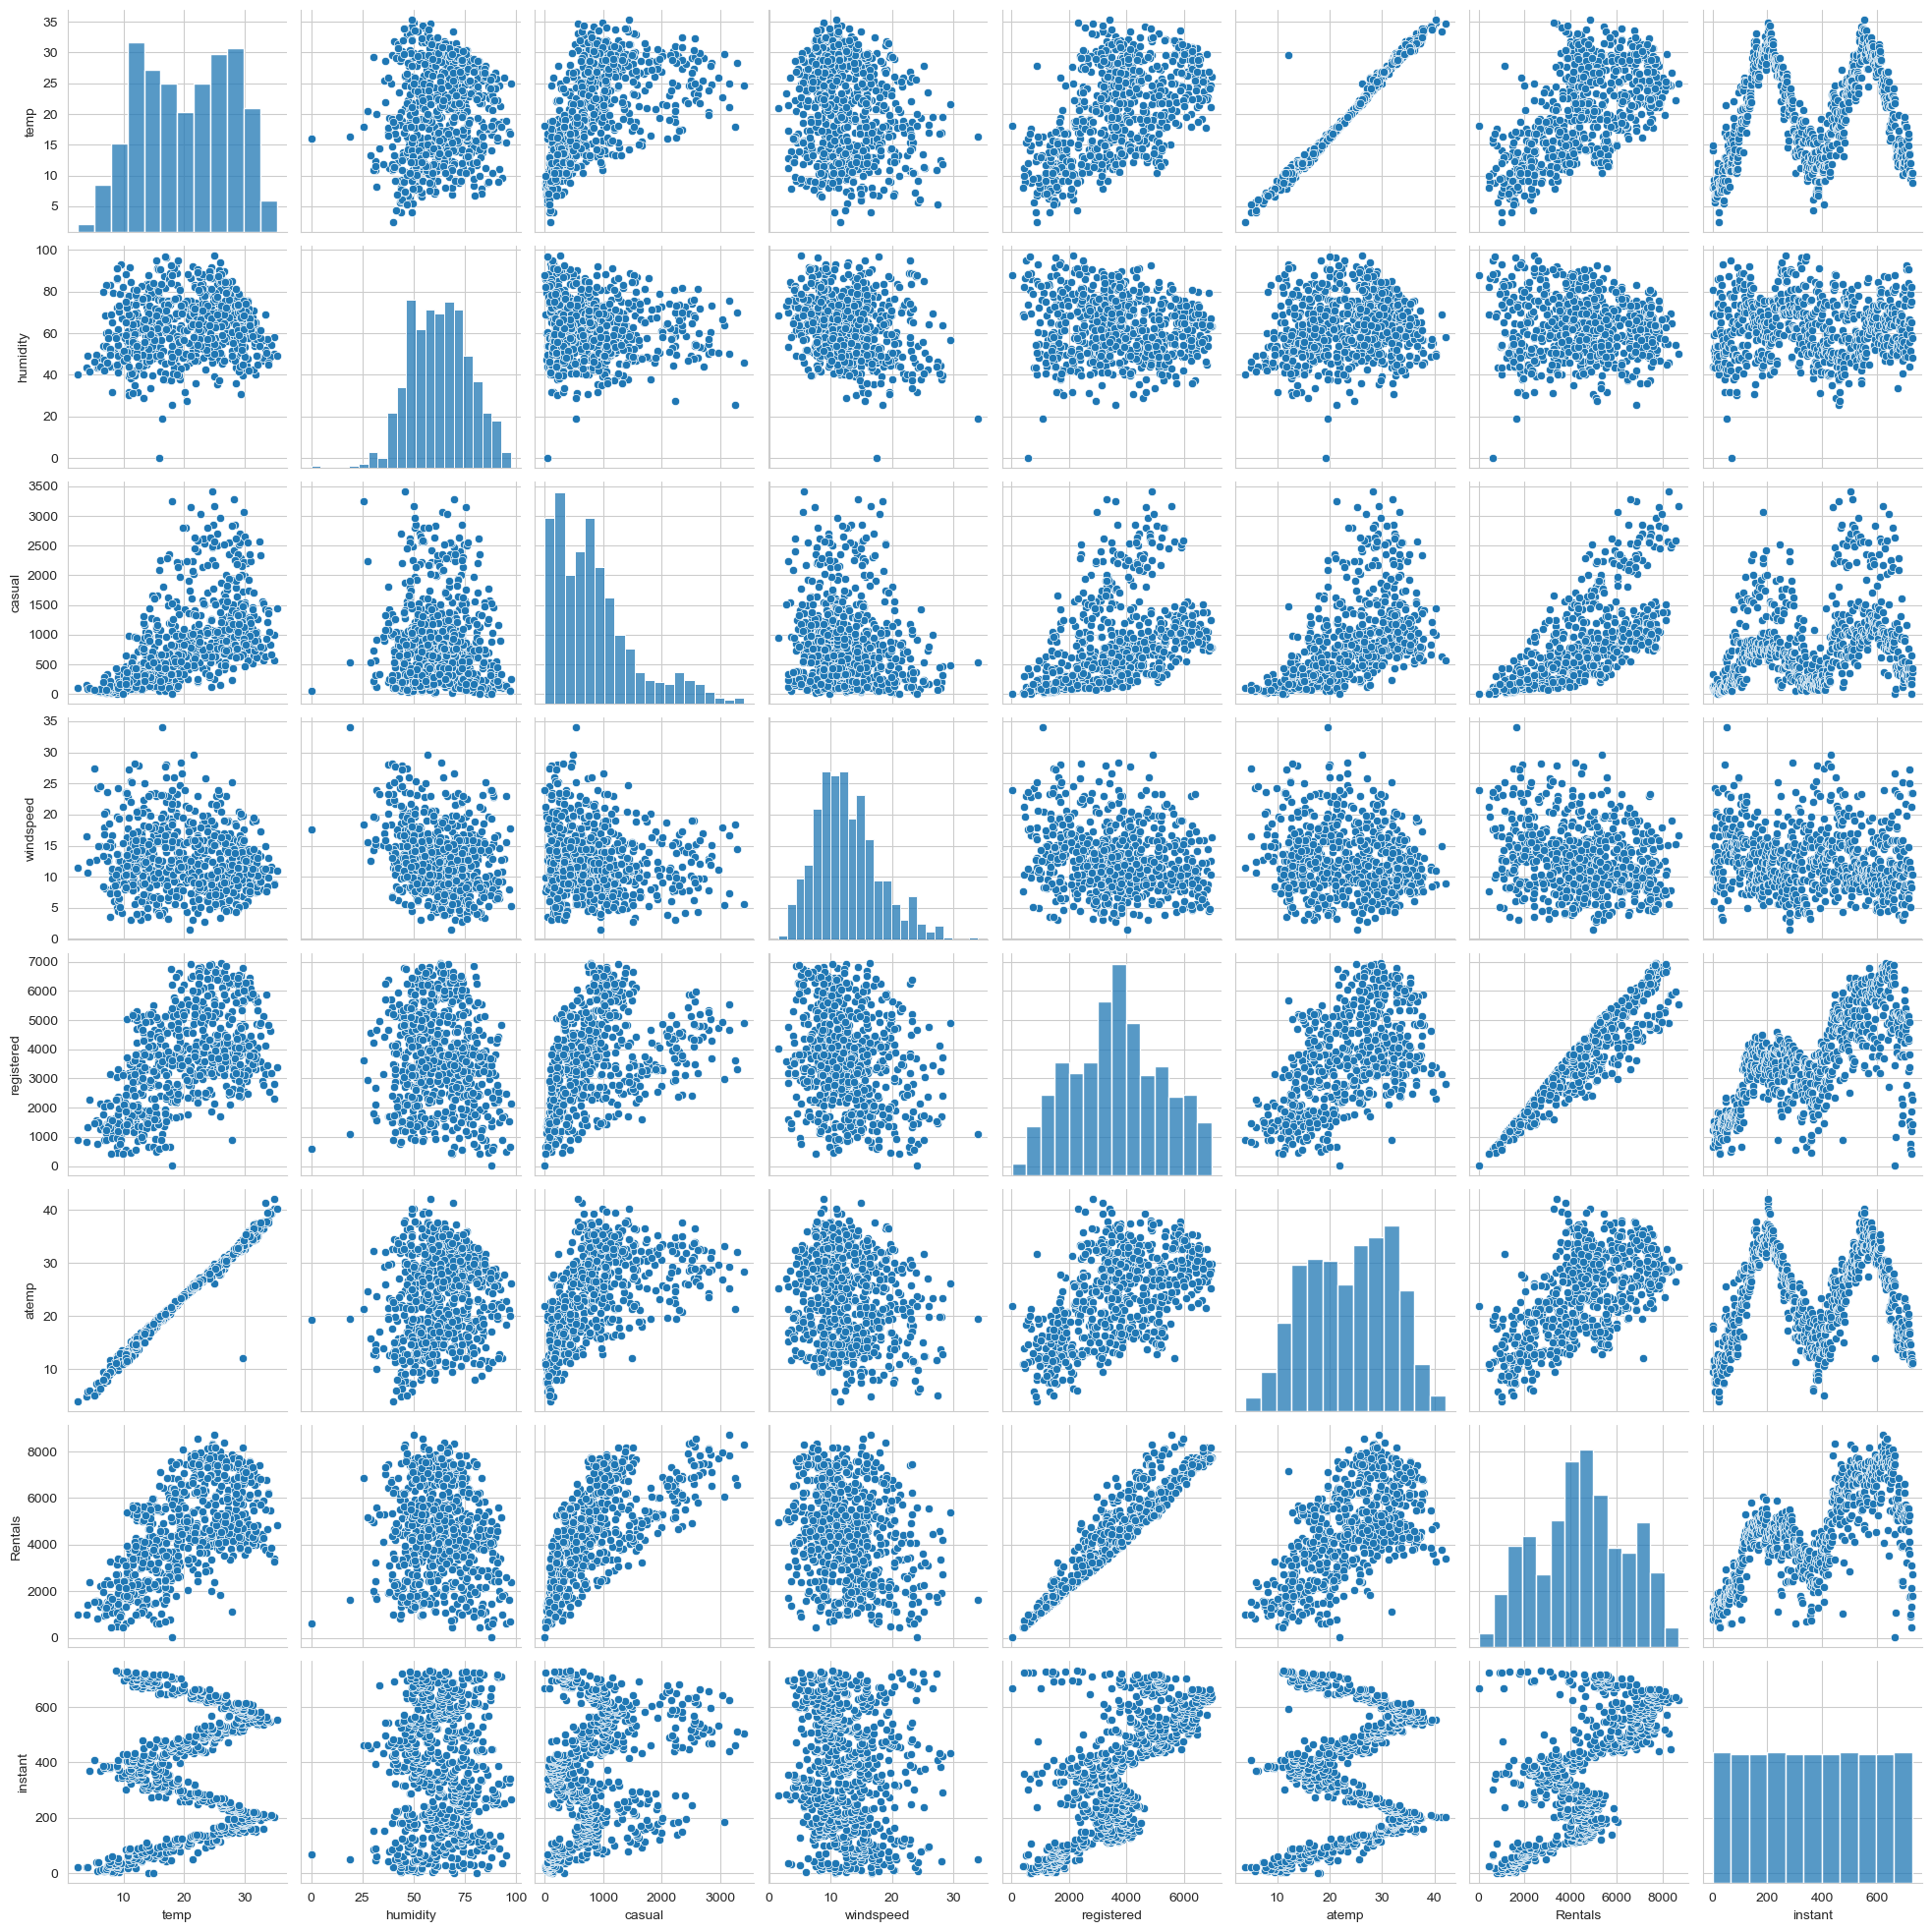

In [34]:
#Pairplot for numeric variables
sns.pairplot(df1, vars=["temp", "humidity",'casual','windspeed','registered','atemp','Rentals','instant'])
plt.show()

#### We can see that there are some independent variables look positively correlated to the 'Total_Sales' variable.
#### Bike rentals are more correlated to temperature.

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

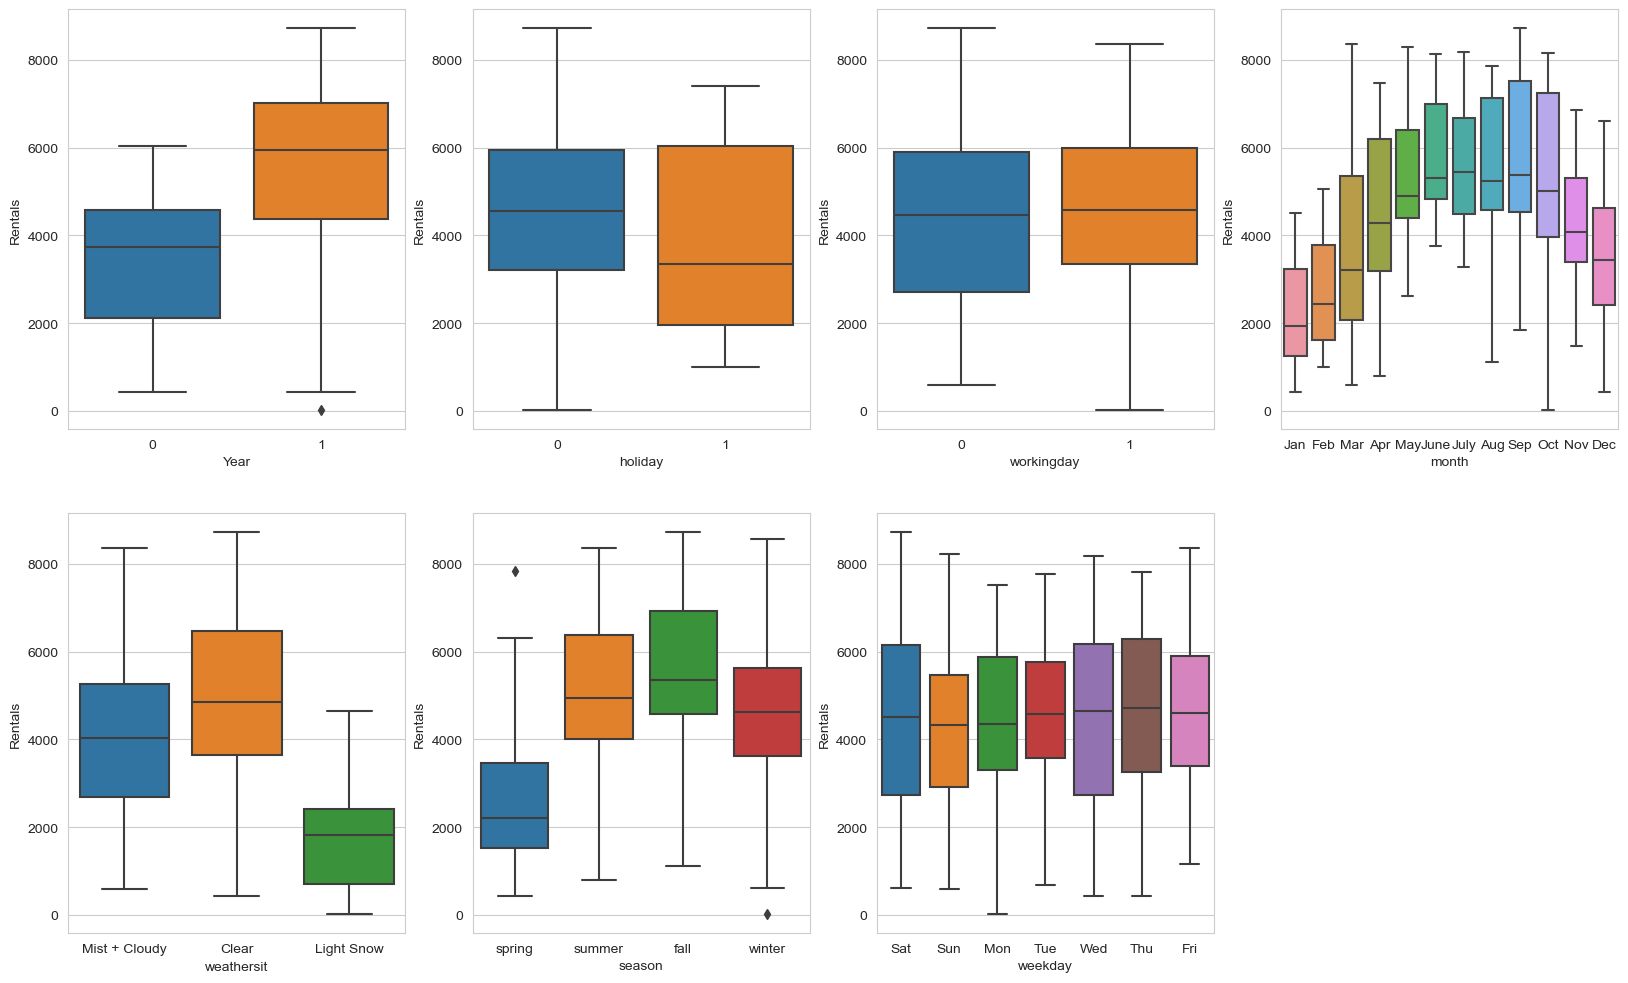

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'Rentals', data = df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'Rentals', data = df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'Rentals', data = df1)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'Rentals', data = df1)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'Rentals', data = df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'Rentals', data = df1)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'Rentals', data = df1)
plt.show()

#### Insights shows the relationship between categorical variables and a Target variable.

Bike Rentals are more :
- During the Fall Season and then in Summer
- In the year 2019 compared to 2018
- In partly cloudy weather
- On Saturday, Wednesday and Thursday

#### Visualizing Using Hue

- We can also visualise some of these categorical features parallely by using the `hue` argument.
- Below is the plot for `weathersit` with `season` as the hue.

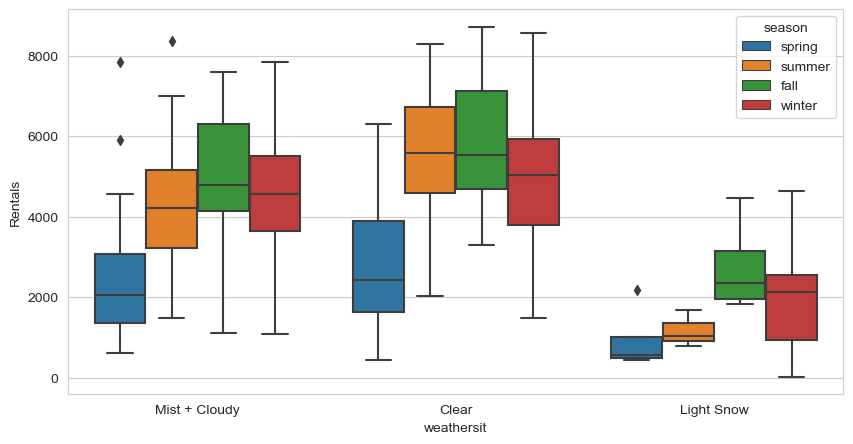

In [41]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'Rentals', hue = 'season', data = df1)
plt.show()

### Univariate Analysis
Let us perform some Univariate Analysis to understand data df1 better.

#### 1. Season
Univariate Analysis on Season compared with Rentals

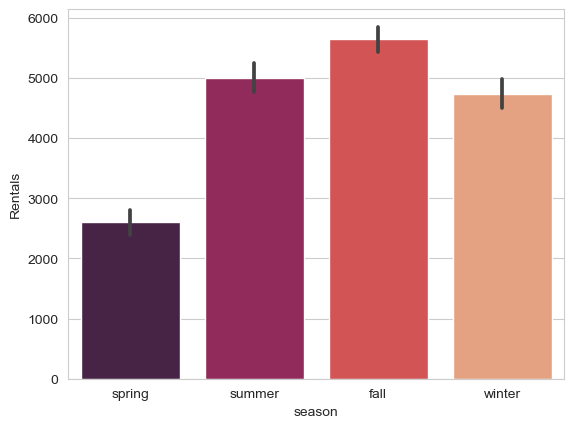

In [46]:
#Relation between season and Total_Sales of bike rentals
sns.barplot(x = 'season', y = 'Rentals', data = df1, palette = "rocket")
plt.show()

##### Bike Rentals are more during the Fall season followed by summer, winter and spring respectively.

#### 2. Year
Univariate Analysis on Year compared with Rentals where 0=2018 and 1=2019

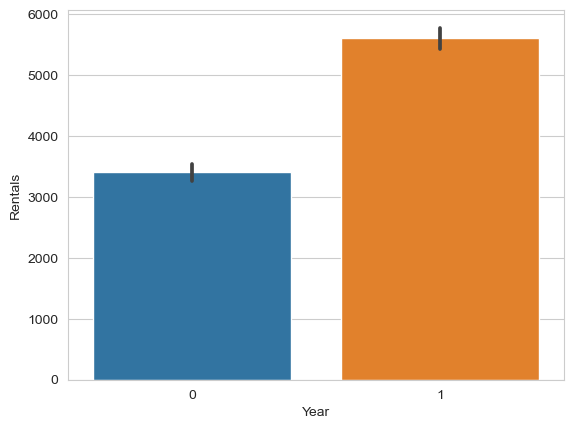

In [50]:
#Relation between Year and Total_Sales of bike rentals
sns.barplot(x = 'Year', y = 'Rentals', data = df1)
plt.show()

##### Bike rentals are more in the year 2019 compared to 2018

#### 3. Year hue with month
Univariate Analysis on Year in hue with month compared Rentals count where 0=2018 and 1=2019

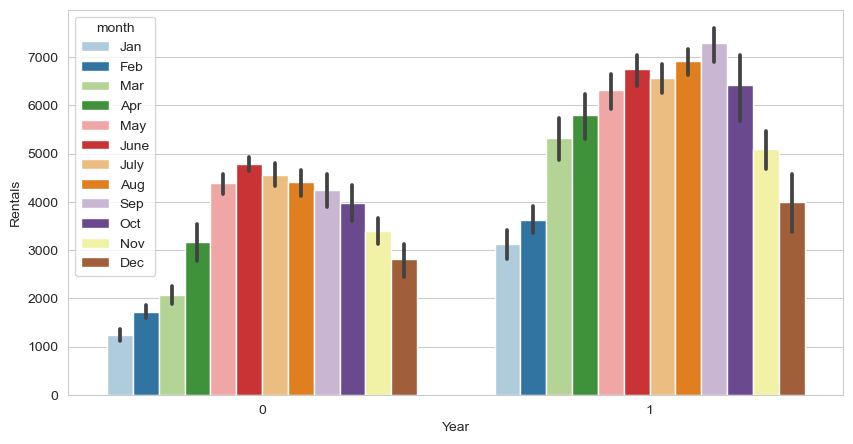

In [54]:
#Relation between Year and Rentals hue with month
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Year', y = 'Rentals', hue = 'month', data = df1, palette = 'Paired')
plt.show()

##### Bike Rentals are more month to month basisin the year 2019 compared to 2018

#### 4. Weathersit
Univariate Analysis on Weathersit compared with Rentals

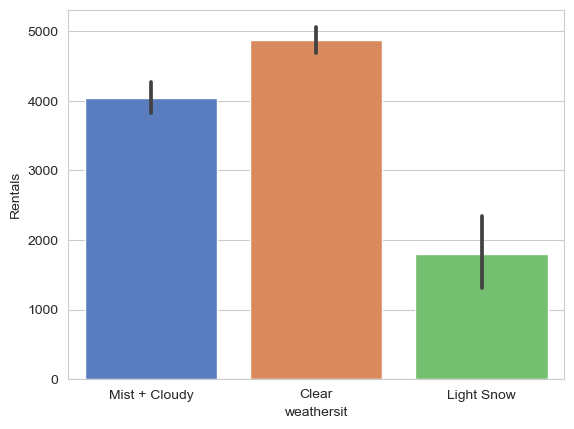

In [57]:
#Relation between weather and Rentals of bike rentals
sns.barplot(x = 'weathersit', y = 'Rentals', palette = "muted", data = df1)
plt.show()

##### Bike Rentals are more in Clear weather

#### 5. Temperature
Univariate Analysis on Temperature compared with Rentals

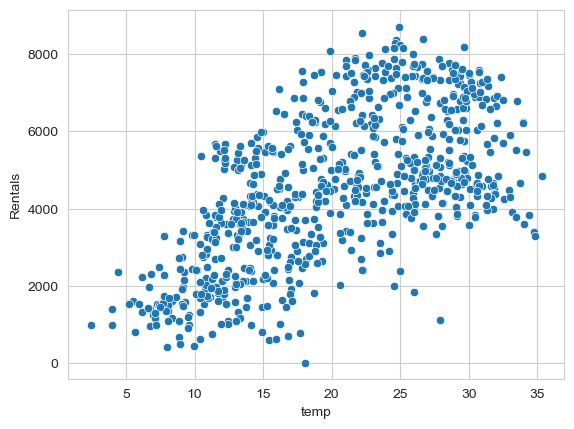

In [62]:
#scatter plot for temperature to Rentals
sns.scatterplot(x = 'temp', y = 'Rentals', data = df1)
plt.show()

##### Bike Rentals are observed at higher temperatures

#### 6. Humidity
Univariate Analysis on Humidity compared with Rentals

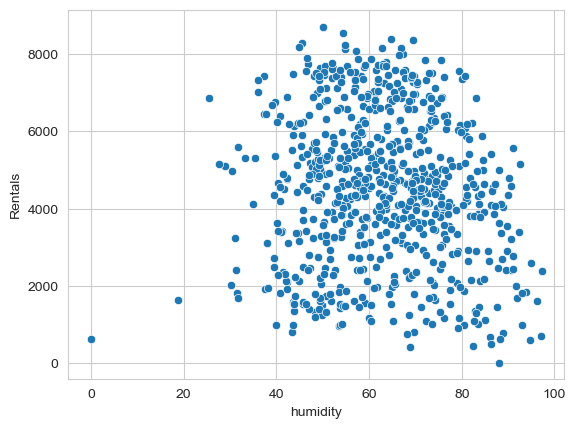

In [66]:
#scatter plot for temperature to count
sns.scatterplot(x = 'humidity', y='Rentals', data = df1)
plt.show()

##### Bike rentals more at high humidity

## Step 3: Data Preparation

### Dropping unnecessary colunms from df1

In [71]:
# Dropping unnecessary columns
df1 = df1.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
df1.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Rentals
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Creating Dummy variables

In [74]:
# # Dummy variables for month, season, weathersit, weekday)
months=pd.get_dummies(df1.month,drop_first=True)
weekdays=pd.get_dummies(df1.weekday,drop_first=True)
weather_sit=pd.get_dummies(df1.weathersit,drop_first=True)
seasons=pd.get_dummies(df1.season,drop_first=True)

In [76]:
# Combining the results to the original df1 dataframe and replacing True and False with numbers.
df1 = pd.concat([months,weekdays,weather_sit,seasons,df1],axis=1)
df1 = df1.replace({True: 1, False: 0})
df1.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Rentals
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [78]:
# Dropping 'season','month','weekday','weathersit' 
df1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df1.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Rentals
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [80]:
#Number of rows and columns
df1.shape

(730, 29)

### Correlation Check Using HeatMap

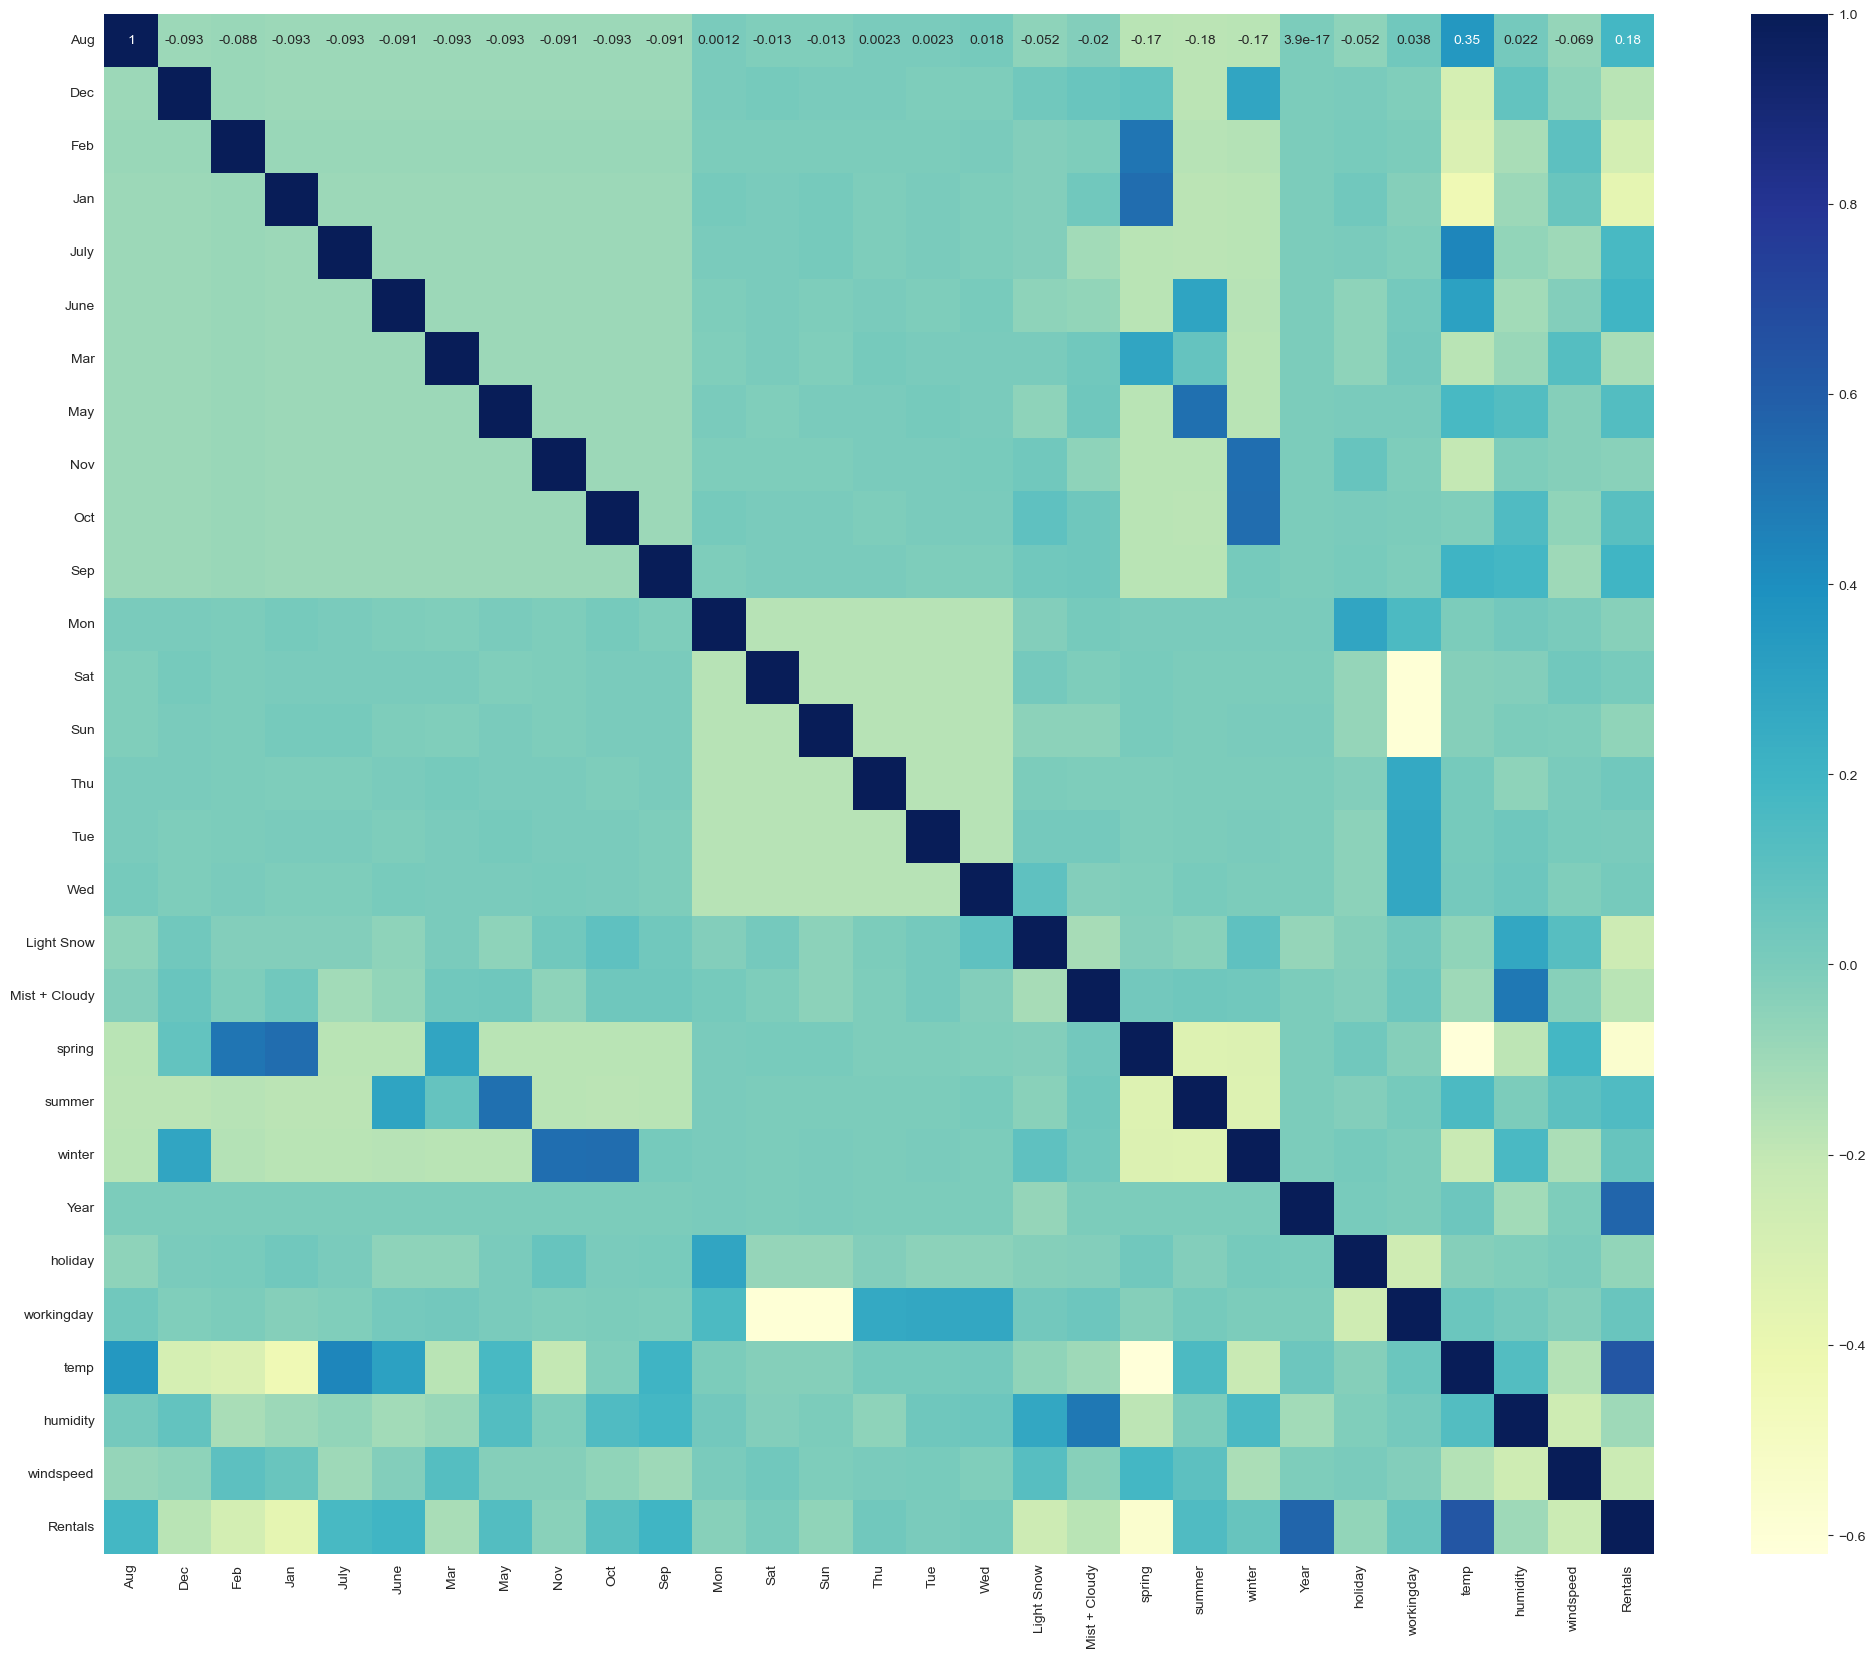

In [83]:
#Now lets check the correlation between variables.
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(df1.corr(), cmap='YlGnBu', annot = True)
plt.show()

#### Temperature,Summer season,June to october months are in good correlation with the 'count' variable & seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [87]:
# The train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df1, train_size = 0.7, random_state = 100)

In [89]:
# Rows and columns after split
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

We noticed that most columns have large integer values and few columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

#### Min-Max scaling

In [93]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','Rentals']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [95]:
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Rentals
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [97]:
#Checking numeric variables(min and max) after scaling
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Rentals
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All the numeric variables are now mapped between 0 and 1.
#### Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors.

### Dividing into X and Y sets for the model building

In [101]:
#Divide the data into X and y
y_train = df_train.pop('Rentals')
X_train = df_train

In [103]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0.345824,0.751824,0.380981


In [105]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: Rentals, dtype: float64

## Step 5: Building a linear model
- Using Statsmodel verifying 
- Statistical Significance of Variable
- VIF

### Building model using Statsmodel

In [109]:
# Adding a Constant we will consider temperature
X_train_sm = sm.add_constant(X_train['temp'])

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the Model
lr_model = lr.fit()

# Checking Parameters
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           2.46e-61
Time:                        09:04:50   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Adding another variable humidity
X_train_sm = X_train[["temp", "humidity"]]
X_train_sm = sm.add_constant(X_train_sm)

# Creating Model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the Model
lr_model = lr.fit()

# Checking Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     200.8
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           5.99e-65
Time:                        09:04:59   Log-Likelihood:                 187.65
No. Observations:                 510   AIC:                            -369.3
Df Residuals:                     507   BIC:                            -356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185      0.036      8.769      0.000       0.247       0.390
temp           0.6661      0.033     19.960      0.000       0.601       0.732
humidity      -0.2506      0.052     -4.850      0.000      -0.352      -0.149
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.354
Skew:                           0.078   Prob(JB):                        0.187
Kurtosis:                       2.635   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Adding another variable windspeed
X_train_sm = X_train[["temp", "humidity", "windspeed"]]
X_train_sm = sm.add_constant(X_train_sm)

# Creating Model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the Model
lr_model = lr.fit()

# Checking Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           2.87e-70
Time:                        09:05:01   Log-Likelihood:                 202.83
No. Observations:                 510   AIC:                            -397.7
Df Residuals:                     506   BIC:                            -380.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4596      0.043     10.580      0.000       0.374       0.545
temp           0.6381      0.033     19.447      0.000       0.574       0.703
humidity      -0.3214      0.052     -6.205      0.000      -0.423      -0.220
windspeed     -0.2492      0.045     -5.571      0.000      -0.337      -0.161
==============================================================================
Omnibus:                        4.176   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.501
Skew:                           0.110   Prob(JB):                        0.174
Kurtosis:                       2.659   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
df1.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'Year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'Rentals'],
      dtype='object')

### Build a Model by Adding all variable and Dropping the variable one by one

### Adding All Variables

In [121]:
# Adding All variables
X_train_sm = sm.add_constant(X_train)

# Creating Model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the Model
lr_model = lr.fit()

# Checking Summary with Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.00e-181
Time:                        09:05:04   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
Year              0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
humidity         -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.64e+15
================================================================

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [124]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday,85.54
12,Sat,19.71
13,Sun,18.34
19,spring,10.75
21,winter,9.44
20,summer,8.27
25,temp,7.08
8,Nov,6.79
9,Oct,6.47
0,Aug,6.36


#### Rebuilding the model without 'March'
'March' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [127]:
# Dropping Column Mar
X = X_train.drop('Mar', axis=1)

In [129]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.87e-182
Time:                        09:05:07   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2437      0.033      7.378      0.000       0.179       0.309
Aug               0.0198      0.032      0.627      0.531      -0.042       0.082
Dec              -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb              -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan              -0.0646      0.022     -2.892      0.004      -0.109      -0.021
July             -0.0344      0.033     -1.035      0.301      -0.100       0.031
June              0.0042      0.023      0.179      0.858      -0.042       0.050
May               0.0243      0.020      1.235      0.218      -0.014       0.063
Nov              -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct               0.0066      0.031      0.215      0.830      -0.054       0.067
Sep               0.0852      0.029      2.945      0.003       0.028       0.142
Mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat               0.0957      0.013      7.203      0.000       0.070       0.122
Sun               0.0415      0.014      3.044      0.002       0.015       0.068
Thu              -0.0091      0.016     -0.587      0.558      -0.040       0.021
Tue              -0.0179      0.015     -1.157      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.709      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.716      0.000      -0.080      -0.039
spring           -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer            0.0427      0.026      1.668      0.096      -0.008       0.093
winter            0.1079      0.027      3.934      0.000       0.054       0.162
Year              0.2324      0.008     28.848      0.000       0.217       0.248
holiday           0.0102      0.024      0.427      0.670      -0.037       0.057
workingday        0.0963      0.012      8.149      0.000       0.073       0.120
temp              0.4450      0.046      9.763      0.000       0.355       0.535
humidity         -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed        -0.1861      0.026     -7.245      0.000      -0.237      -0.136
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                     7.11e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [131]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,workingday,74.85
11,Sat,17.21
12,Sun,16.19
18,spring,9.65
20,winter,9.12
19,summer,7.95
24,temp,6.89
0,Aug,5.64
4,July,5.08
7,Nov,4.86


#### Rebuilding the model without 'June'
'June' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [134]:
# Dropping Column June
X = X.drop('June', axis=1)

In [136]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.72e-183
Time:                        09:05:12   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2442      0.033      7.428      0.000       0.180       0.309
Aug               0.0163      0.025      0.656      0.512      -0.033       0.065
Dec              -0.0457      0.026     -1.768      0.078      -0.097       0.005
Feb              -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan              -0.0640      0.022     -2.902      0.004      -0.107      -0.021
July             -0.0381      0.026     -1.481      0.139      -0.089       0.012
May               0.0226      0.017      1.305      0.192      -0.011       0.057
Nov              -0.0417      0.030     -1.370      0.171      -0.101       0.018
Oct               0.0052      0.030      0.176      0.860      -0.053       0.064
Sep               0.0825      0.024      3.381      0.001       0.035       0.130
Mon              -0.0209      0.015     -1.364      0.173      -0.051       0.009
Sat               0.0960      0.013      7.265      0.000       0.070       0.122
Sun               0.0417      0.014      3.077      0.002       0.015       0.068
Thu              -0.0091      0.015     -0.589      0.556      -0.040       0.021
Tue              -0.0180      0.015     -1.160      0.247      -0.048       0.012
Wed              -0.0054      0.015     -0.365      0.715      -0.035       0.024
Light Snow       -0.2557      0.026     -9.717      0.000      -0.307      -0.204
Mist + Cloudy    -0.0595      0.010     -5.720      0.000      -0.080      -0.039
spring           -0.0459      0.027     -1.704      0.089      -0.099       0.007
summer            0.0416      0.025      1.678      0.094      -0.007       0.090
winter            0.1070      0.027      3.972      0.000       0.054       0.160
Year              0.2323      0.008     28.999      0.000       0.217       0.248
holiday           0.0101      0.024      0.423      0.672      -0.037       0.057
workingday        0.0965      0.012      8.186      0.000       0.073       0.120
temp              0.4493      0.039     11.630      0.000       0.373       0.525
humidity         -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed        -0.1865      0.026     -7.302      0.000      -0.237      -0.136
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                     6.73e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.5e-29. This migh

In [138]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,workingday,74.29
10,Sat,17.04
11,Sun,16.03
19,winter,8.81
17,spring,8.72
18,summer,7.47
23,temp,4.96
6,Nov,4.76
7,Oct,4.45
21,holiday,4.11


#### Rebuilding the model without 'Holiday'
'Holiday' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [141]:
# Dropping Column holiday
X = X.drop('holiday', axis=1)

In [143]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.72e-183
Time:                        09:05:15   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2543      0.050      5.116      0.000       0.157       0.352
Aug               0.0163      0.025      0.656      0.512      -0.033       0.065
Dec              -0.0457      0.026     -1.768      0.078      -0.097       0.005
Feb              -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan              -0.0640      0.022     -2.902      0.004      -0.107      -0.021
July             -0.0381      0.026     -1.481      0.139      -0.089       0.012
May               0.0226      0.017      1.305      0.192      -0.011       0.057
Nov              -0.0417      0.030     -1.370      0.171      -0.101       0.018
Oct               0.0052      0.030      0.176      0.860      -0.053       0.064
Sep               0.0825      0.024      3.381      0.001       0.035       0.130
Mon              -0.0209      0.015     -1.364      0.173      -0.051       0.009
Sat               0.0859      0.030      2.860      0.004       0.027       0.145
Sun               0.0316      0.030      1.050      0.294      -0.028       0.091
Thu              -0.0091      0.015     -0.589      0.556      -0.040       0.021
Tue              -0.0180      0.015     -1.160      0.247      -0.048       0.012
Wed              -0.0054      0.015     -0.365      0.715      -0.035       0.024
Light Snow       -0.2557      0.026     -9.717      0.000      -0.307      -0.204
Mist + Cloudy    -0.0595      0.010     -5.720      0.000      -0.080      -0.039
spring           -0.0459      0.027     -1.704      0.089      -0.099       0.007
summer            0.0416      0.025      1.678      0.094      -0.007       0.090
winter            0.1070      0.027      3.972      0.000       0.054       0.160
Year              0.2323      0.008     28.999      0.000       0.217       0.248
workingday        0.0864      0.027      3.255      0.001       0.034       0.139
temp              0.4493      0.039     11.630      0.000       0.373       0.525
humidity         -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed        -0.1865      0.026     -7.302      0.000      -0.237      -0.136
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,humidity,38.14
22,temp,24.50
21,workingday,21.15
19,winter,10.90
17,spring,8.48
18,summer,7.36
10,Sat,6.21
11,Sun,5.87
24,windspeed,5.21
6,Nov,4.68


#### Rebuilding the model without 'October'
'October' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [148]:
# Dropping Column Otober
X = X.drop('Oct', axis=1)

In [150]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.53e-184
Time:                        09:05:17   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2560      0.049      5.252      0.000       0.160       0.352
Aug               0.0150      0.024      0.633      0.527      -0.031       0.061
Dec              -0.0490      0.018     -2.689      0.007      -0.085      -0.013
Feb              -0.0344      0.021     -1.602      0.110      -0.077       0.008
Jan              -0.0650      0.021     -3.059      0.002      -0.107      -0.023
July             -0.0395      0.025     -1.600      0.110      -0.088       0.009
May               0.0226      0.017      1.307      0.192      -0.011       0.057
Nov              -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep               0.0804      0.021      3.748      0.000       0.038       0.123
Mon              -0.0209      0.015     -1.370      0.171      -0.051       0.009
Sat               0.0854      0.030      2.858      0.004       0.027       0.144
Sun               0.0312      0.030      1.041      0.298      -0.028       0.090
Thu              -0.0092      0.015     -0.591      0.555      -0.040       0.021
Tue              -0.0180      0.015     -1.164      0.245      -0.048       0.012
Wed              -0.0055      0.015     -0.367      0.714      -0.035       0.024
Light Snow       -0.2556      0.026     -9.726      0.000      -0.307      -0.204
Mist + Cloudy    -0.0595      0.010     -5.737      0.000      -0.080      -0.039
spring           -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer            0.0401      0.023      1.722      0.086      -0.006       0.086
winter            0.1096      0.023      4.826      0.000       0.065       0.154
Year              0.2323      0.008     29.032      0.000       0.217       0.248
workingday        0.0860      0.026      3.256      0.001       0.034       0.138
temp              0.4487      0.038     11.669      0.000       0.373       0.524
humidity         -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed        -0.1862      0.025     -7.313      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,humidity,36.66
21,temp,24.49
20,workingday,21.14
16,spring,8.46
17,summer,6.75
18,winter,6.71
9,Sat,6.20
10,Sun,5.86
23,windspeed,5.13
0,Aug,3.27


### Rebuilding the model without 'Wednesday'
'Wednesday' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [155]:
# Dropping Column Wednesday
X = X.drop('Wed', axis=1)

In [157]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.42e-185
Time:                        09:05:19   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2539      0.048      5.250      0.000       0.159       0.349
Aug               0.0151      0.024      0.638      0.524      -0.031       0.061
Dec              -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb              -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan              -0.0651      0.021     -3.067      0.002      -0.107      -0.023
July             -0.0392      0.025     -1.591      0.112      -0.088       0.009
May               0.0227      0.017      1.311      0.191      -0.011       0.057
Nov              -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep               0.0803      0.021      3.746      0.000       0.038       0.122
Mon              -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat               0.0881      0.029      3.043      0.002       0.031       0.145
Sun               0.0339      0.029      1.168      0.244      -0.023       0.091
Thu              -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue              -0.0150      0.013     -1.145      0.253      -0.041       0.011
Light Snow       -0.2563      0.026     -9.782      0.000      -0.308      -0.205
Mist + Cloudy    -0.0593      0.010     -5.730      0.000      -0.080      -0.039
spring           -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer            0.0399      0.023      1.716      0.087      -0.006       0.086
winter            0.1095      0.023      4.830      0.000       0.065       0.154
Year              0.2322      0.008     29.055      0.000       0.217       0.248
workingday        0.0856      0.026      3.248      0.001       0.034       0.137
temp              0.4483      0.038     11.674      0.000       0.373       0.524
humidity         -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed        -0.1862      0.025     -7.319      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,humidity,36.38
20,temp,24.25
19,workingday,20.83
15,spring,8.39
16,summer,6.70
17,winter,6.69
9,Sat,5.91
10,Sun,5.58
22,windspeed,5.13
0,Aug,3.26


#### Rebuilding the model without 'Thursday'
'Thursday' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [162]:
# Dropping Column Thursday
X = X.drop('Thu', axis=1)

In [164]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.36e-186
Time:                        09:05:22   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2512      0.048      5.235      0.000       0.157       0.345
Aug               0.0152      0.024      0.645      0.520      -0.031       0.062
Dec              -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb              -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan              -0.0650      0.021     -3.066      0.002      -0.107      -0.023
July             -0.0389      0.025     -1.583      0.114      -0.087       0.009
May               0.0228      0.017      1.317      0.188      -0.011       0.057
Nov              -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep               0.0803      0.021      3.747      0.000       0.038       0.122
Mon              -0.0160      0.012     -1.310      0.191      -0.040       0.008
Sat               0.0905      0.028      3.175      0.002       0.034       0.146
Sun               0.0363      0.029      1.268      0.205      -0.020       0.092
Tue              -0.0131      0.012     -1.052      0.293      -0.037       0.011
Light Snow       -0.2565      0.026     -9.797      0.000      -0.308      -0.205
Mist + Cloudy    -0.0591      0.010     -5.719      0.000      -0.079      -0.039
spring           -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer            0.0401      0.023      1.726      0.085      -0.006       0.086
winter            0.1099      0.023      4.851      0.000       0.065       0.154
Year              0.2322      0.008     29.077      0.000       0.217       0.248
workingday        0.0861      0.026      3.269      0.001       0.034       0.138
temp              0.4484      0.038     11.686      0.000       0.373       0.524
humidity         -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed        -0.1863      0.025     -7.327      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,humidity,36.34
19,temp,24.14
18,workingday,20.80
14,spring,8.36
16,winter,6.68
15,summer,6.68
9,Sat,5.81
10,Sun,5.49
21,windspeed,5.12
0,Aug,3.26


#### Rebuilding the model without 'August'
'August' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [169]:
# Dropping Column August
X = X.drop('Aug', axis=1)

In [171]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.47e-187
Time:                        09:05:24   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2594      0.046      5.611      0.000       0.169       0.350
Dec              -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb              -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan              -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July             -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May               0.0224      0.017      1.299      0.195      -0.012       0.056
Nov              -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sep               0.0716      0.017      4.303      0.000       0.039       0.104
Mon              -0.0160      0.012     -1.317      0.188      -0.040       0.008
Sat               0.0911      0.028      3.201      0.001       0.035       0.147
Sun               0.0364      0.029      1.275      0.203      -0.020       0.093
Tue              -0.0129      0.012     -1.040      0.299      -0.037       0.011
Light Snow       -0.2573      0.026     -9.847      0.000      -0.309      -0.206
Mist + Cloudy    -0.0588      0.010     -5.703      0.000      -0.079      -0.039
spring           -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer            0.0298      0.017      1.766      0.078      -0.003       0.063
winter            0.1009      0.018      5.663      0.000       0.066       0.136
Year              0.2324      0.008     29.128      0.000       0.217       0.248
workingday        0.0863      0.026      3.282      0.001       0.035       0.138
temp              0.4502      0.038     11.769      0.000       0.375       0.525
humidity         -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed        -0.1864      0.025     -7.338      0.000      -0.236      -0.137
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,humidity,35.48
18,temp,22.61
17,workingday,19.86
13,spring,6.09
8,Sat,5.52
9,Sun,5.30
20,windspeed,5.09
15,winter,4.45
14,summer,3.76
2,Jan,2.43


#### Rebuilding the model without 'Tuesday'
'Tuesday' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [176]:
# Dropping Column Tuesday
X = X.drop('Tue', axis=1)

In [178]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.51e-188
Time:                        09:05:26   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2580      0.046      5.582      0.000       0.167       0.349
Dec              -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb              -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan              -0.0649      0.021     -3.062      0.002      -0.107      -0.023
July             -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May               0.0222      0.017      1.285      0.199      -0.012       0.056
Nov              -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep               0.0718      0.017      4.314      0.000       0.039       0.104
Mon              -0.0130      0.012     -1.102      0.271      -0.036       0.010
Sat               0.0934      0.028      3.289      0.001       0.038       0.149
Sun               0.0389      0.029      1.364      0.173      -0.017       0.095
Light Snow       -0.2557      0.026     -9.802      0.000      -0.307      -0.204
Mist + Cloudy    -0.0586      0.010     -5.683      0.000      -0.079      -0.038
spring           -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer            0.0296      0.017      1.751      0.081      -0.004       0.063
winter            0.1004      0.018      5.639      0.000       0.065       0.135
Year              0.2323      0.008     29.122      0.000       0.217       0.248
workingday        0.0856      0.026      3.254      0.001       0.034       0.137
temp              0.4505      0.038     11.777      0.000       0.375       0.526
humidity         -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed        -0.1869      0.025     -7.358      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,humidity,35.40
17,temp,22.60
16,workingday,19.79
12,spring,6.09
8,Sat,5.49
9,Sun,5.26
19,windspeed,5.09
14,winter,4.45
13,summer,3.75
2,Jan,2.43


#### Rebuilding the model without 'Monday'
'Monday' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [183]:
# Dropping Column Monday
X = X.drop('Mon', axis=1)

In [185]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          5.20e-189
Time:                        09:05:28   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2478      0.045      5.472      0.000       0.159       0.337
Dec              -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb              -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan              -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July             -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May               0.0229      0.017      1.325      0.186      -0.011       0.057
Nov              -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep               0.0723      0.017      4.349      0.000       0.040       0.105
Sat               0.1036      0.027      3.864      0.000       0.051       0.156
Sun               0.0492      0.027      1.827      0.068      -0.004       0.102
Light Snow       -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Mist + Cloudy    -0.0583      0.010     -5.655      0.000      -0.079      -0.038
spring           -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer            0.0295      0.017      1.747      0.081      -0.004       0.063
winter            0.1001      0.018      5.618      0.000       0.065       0.135
Year              0.2318      0.008     29.103      0.000       0.216       0.247
workingday        0.0933      0.025      3.679      0.000       0.043       0.143
temp              0.4527      0.038     11.846      0.000       0.378       0.528
humidity         -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed        -0.1873      0.025     -7.371      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,humidity,34.75
16,temp,22.48
15,workingday,19.11
11,spring,6.06
7,Sat,5.10
18,windspeed,5.06
8,Sun,4.89
13,winter,4.40
12,summer,3.71
2,Jan,2.42


#### Rebuilding the model without 'May'
'May' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [190]:
# Dropping Column May
X = X.drop('May', axis=1)

In [192]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          9.80e-190
Time:                        09:05:32   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2368      0.045      5.315      0.000       0.149       0.324
Dec              -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb              -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan              -0.0634      0.021     -2.991      0.003      -0.105      -0.022
July             -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov              -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep               0.0723      0.017      4.346      0.000       0.040       0.105
Sat               0.1040      0.027      3.875      0.000       0.051       0.157
Sun               0.0500      0.027      1.855      0.064      -0.003       0.103
Light Snow       -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Mist + Cloudy    -0.0585      0.010     -5.668      0.000      -0.079      -0.038
spring           -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer            0.0393      0.015      2.586      0.010       0.009       0.069
winter            0.1021      0.018      5.752      0.000       0.067       0.137
Year              0.2312      0.008     29.052      0.000       0.216       0.247
workingday        0.0942      0.025      3.713      0.000       0.044       0.144
temp              0.4616      0.038     12.262      0.000       0.388       0.536
humidity         -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed        -0.1889      0.025     -7.441      0.000      -0.239      -0.139
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,humidity,34.64
15,temp,22.30
14,workingday,18.92
10,spring,6.05
6,Sat,5.04
17,windspeed,4.99
7,Sun,4.85
12,winter,4.40
11,summer,3.11
2,Jan,2.42


#### Rebuilding the model without 'Febraury'
'Febraury' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [197]:
# Dropping Column Febraury
X = X.drop('Feb', axis=1)

In [199]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.52e-190
Time:                        09:05:41   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2235      0.044      5.103      0.000       0.137       0.310
Dec              -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan              -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July             -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov              -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep               0.0737      0.017      4.430      0.000       0.041       0.106
Sat               0.1068      0.027      3.984      0.000       0.054       0.160
Sun               0.0520      0.027      1.931      0.054      -0.001       0.105
Light Snow       -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Mist + Cloudy    -0.0583      0.010     -5.637      0.000      -0.079      -0.038
spring           -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer            0.0424      0.015      2.809      0.005       0.013       0.072
winter            0.1038      0.018      5.845      0.000       0.069       0.139
Year              0.2309      0.008     28.978      0.000       0.215       0.247
workingday        0.0964      0.025      3.801      0.000       0.047       0.146
temp              0.4764      0.036     13.064      0.000       0.405       0.548
humidity         -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed        -0.1879      0.025     -7.390      0.000      -0.238      -0.138
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,humidity,34.19
14,temp,21.56
13,workingday,18.84
9,spring,5.06
5,Sat,5.03
16,windspeed,4.99
6,Sun,4.83
11,winter,4.40
10,summer,3.09
8,Mist + Cloudy,2.35


#### Rebuilding the model without 'Humidity'
'Humidity' variable can be dropped as its insignificant by looking at it has very high VIF.

In [204]:
# Dropping Column Humidity
X = X.drop('humidity', axis=1)

In [206]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          4.83e-188
Time:                        09:05:42   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1542      0.041      3.776      0.000       0.074       0.234
Dec              -0.0458      0.017     -2.627      0.009      -0.080      -0.012
Jan              -0.0517      0.018     -2.864      0.004      -0.087      -0.016
July             -0.0475      0.018     -2.609      0.009      -0.083      -0.012
Nov              -0.0407      0.019     -2.162      0.031      -0.078      -0.004
Sep               0.0674      0.017      4.009      0.000       0.034       0.100
Sat               0.1094      0.027      4.022      0.000       0.056       0.163
Sun               0.0498      0.027      1.822      0.069      -0.004       0.104
Light Snow       -0.2976      0.024    -12.277      0.000      -0.345      -0.250
Mist + Cloudy    -0.0821      0.009     -9.590      0.000      -0.099      -0.065
spring           -0.0698      0.021     -3.304      0.001      -0.111      -0.028
summer            0.0356      0.015      2.339      0.020       0.006       0.066
winter            0.0901      0.018      5.095      0.000       0.055       0.125
Year              0.2346      0.008     29.217      0.000       0.219       0.250
workingday        0.0972      0.026      3.776      0.000       0.047       0.148
temp              0.4370      0.036     12.260      0.000       0.367       0.507
windspeed        -0.1602      0.025     -6.452      0.000      -0.209      -0.111
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,workingday,17.17
14,temp,13.62
15,windspeed,4.85
5,Sat,4.70
6,Sun,4.39
9,spring,4.24
11,winter,3.71
10,summer,2.78
12,Year,2.08
3,Nov,1.80


#### Rebuilding the model without 'Sunday'
'Sunday' variable can be dropped as its insignificant by looking at it has very high P-Value.

In [211]:
# Dropping Column Sunday
X = X.drop('Sun', axis=1)

In [213]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.84e-188
Time:                        09:05:44   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1985      0.033      6.031      0.000       0.134       0.263
Dec              -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan              -0.0526      0.018     -2.905      0.004      -0.088      -0.017
July             -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov              -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep               0.0652      0.017      3.880      0.000       0.032       0.098
Sat               0.0670      0.014      4.758      0.000       0.039       0.095
Light Snow       -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Mist + Cloudy    -0.0818      0.009     -9.526      0.000      -0.099      -0.065
spring           -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer            0.0354      0.015      2.320      0.021       0.005       0.065
winter            0.0903      0.018      5.093      0.000       0.055       0.125
Year              0.2348      0.008     29.173      0.000       0.219       0.251
workingday        0.0547      0.011      5.009      0.000       0.033       0.076
temp              0.4354      0.036     12.191      0.000       0.365       0.506
windspeed        -0.1609      0.025     -6.464      0.000      -0.210      -0.112
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,6.92
12,workingday,4.74
14,windspeed,4.71
8,spring,3.09
10,winter,3.03
9,summer,2.33
11,Year,2.08
5,Sat,1.86
3,Nov,1.79
1,Jan,1.67


#### Rebuilding the model without 'November'
'November' variable can be dropped as its insignificant by looking at it has P-Value above zero.

In [218]:
# Dropping Column November
X = X.drop('Nov', axis=1)

In [220]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.3
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.21e-188
Time:                        09:05:46   Log-Likelihood:                 510.41
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1788      0.032      5.586      0.000       0.116       0.242
Dec              -0.0302      0.016     -1.874      0.062      -0.062       0.001
Jan              -0.0471      0.018     -2.612      0.009      -0.083      -0.012
July             -0.0463      0.018     -2.526      0.012      -0.082      -0.010
Sep               0.0712      0.017      4.260      0.000       0.038       0.104
Sat               0.0680      0.014      4.811      0.000       0.040       0.096
Light Snow       -0.2923      0.024    -12.012      0.000      -0.340      -0.244
Mist + Cloudy    -0.0808      0.009     -9.381      0.000      -0.098      -0.064
spring           -0.0623      0.021     -2.979      0.003      -0.103      -0.021
summer            0.0416      0.015      2.757      0.006       0.012       0.071
winter            0.0794      0.017      4.614      0.000       0.046       0.113
Year              0.2347      0.008     29.015      0.000       0.219       0.251
workingday        0.0553      0.011      5.035      0.000       0.034       0.077
temp              0.4574      0.035     13.196      0.000       0.389       0.526
windspeed        -0.1621      0.025     -6.481      0.000      -0.211      -0.113
==============================================================================
Omnibus:                       79.630   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.616
Skew:                          -0.774   Prob(JB):                     1.12e-46
Kurtosis:                       5.750   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.87
11,workingday,4.73
13,windspeed,4.67
7,spring,3.09
8,summer,2.33
9,winter,2.14
10,Year,2.08
4,Sat,1.86
1,Jan,1.67
2,July,1.59


#### Rebuilding the model without 'December'
'December' variable can be dropped as its insignificant by looking at it has very high P-Value and Low VIF.

In [225]:
# Dropping Column December
X = X.drop('Dec', axis=1)

In [227]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          8.68e-189
Time:                        09:05:49   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1657      0.031      5.292      0.000       0.104       0.227
Jan              -0.0398      0.018     -2.252      0.025      -0.074      -0.005
July             -0.0468      0.018     -2.549      0.011      -0.083      -0.011
Sep               0.0736      0.017      4.406      0.000       0.041       0.106
Sat               0.0667      0.014      4.710      0.000       0.039       0.094
Light Snow       -0.2896      0.024    -11.895      0.000      -0.337      -0.242
Mist + Cloudy    -0.0807      0.009     -9.351      0.000      -0.098      -0.064
spring           -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer            0.0448      0.015      2.980      0.003       0.015       0.074
winter            0.0775      0.017      4.499      0.000       0.044       0.111
Year              0.2346      0.008     28.941      0.000       0.219       0.251
workingday        0.0546      0.011      4.967      0.000       0.033       0.076
temp              0.4724      0.034     13.966      0.000       0.406       0.539
windspeed        -0.1572      0.025     -6.306      0.000      -0.206      -0.108
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.82
10,workingday,4.68
12,windspeed,4.66
6,spring,2.99
7,summer,2.33
9,Year,2.08
8,winter,1.91
3,Sat,1.84
0,Jan,1.62
1,July,1.59


#### Rebuilding the model without 'January'
'January' variable can be dropped as its insignificant by looking at it has P-Value above zero and Low VIF.

In [232]:
# Dropping Column January
X = X.drop('Jan', axis=1)

In [234]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          7.12e-189
Time:                        09:05:51   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881      0.000       0.089       0.209
July             -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep               0.0740      0.017      4.414      0.000       0.041       0.107
Sat               0.0664      0.014      4.671      0.000       0.038       0.094
Light Snow       -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Mist + Cloudy    -0.0817      0.009     -9.428      0.000      -0.099      -0.065
spring           -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer            0.0481      0.015      3.196      0.001       0.019       0.078
winter            0.0838      0.017      4.910      0.000       0.050       0.117
Year              0.2339      0.008     28.756      0.000       0.218       0.250
workingday        0.0545      0.011      4.938      0.000       0.033       0.076
temp              0.4920      0.033     14.991      0.000       0.427       0.556
windspeed        -0.1499      0.025     -6.040      0.000      -0.199      -0.101
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,Year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,Mist + Cloudy,1.57


#### Rebuilding the model without 'July'
'July' variable can be dropped as its insignificant by looking at it has P-Value above zero.

In [239]:
# Dropping Column July
X = X.drop('July', axis=1)

In [241]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.42e-188
Time:                        09:05:54   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1406      0.031      4.597      0.000       0.080       0.201
Sep               0.0873      0.016      5.423      0.000       0.056       0.119
Sat               0.0667      0.014      4.665      0.000       0.039       0.095
Light Snow       -0.2893      0.025    -11.765      0.000      -0.338      -0.241
Mist + Cloudy    -0.0804      0.009     -9.241      0.000      -0.097      -0.063
spring           -0.0554      0.021     -2.692      0.007      -0.096      -0.015
summer            0.0626      0.014      4.447      0.000       0.035       0.090
winter            0.0958      0.017      5.788      0.000       0.063       0.128
Year              0.2344      0.008     28.655      0.000       0.218       0.250
workingday        0.0555      0.011      4.996      0.000       0.034       0.077
temp              0.4796      0.033     14.678      0.000       0.415       0.544
windspeed        -0.1500      0.025     -6.007      0.000      -0.199      -0.101
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.48
8,workingday,4.66
10,windspeed,4.64
4,spring,2.30
7,Year,2.07
5,summer,2.00
1,Sat,1.83
6,winter,1.76
3,Mist + Cloudy,1.57
0,Sep,1.23


#### Rebuilding the model without 'Spring'
'Spring' variable can be dropped as its insignificant by looking at it has P-Value above zero.

In [246]:
# Dropping Column Spring
X = X.drop('spring', axis=1)

In [248]:
# Creating another model
X_train_sm = sm.add_constant(X)

#Create Model
lr = sm.OLS(y_train, X_train_sm)

# fit Model
lr_model = lr.fit()

# Summary & Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rentals   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.13e-188
Time:                        09:05:56   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0750      0.019      4.031      0.000       0.038       0.112
Sep               0.0974      0.016      6.184      0.000       0.066       0.128
Sat               0.0675      0.014      4.693      0.000       0.039       0.096
Light Snow       -0.2871      0.025    -11.611      0.000      -0.336      -0.239
Mist + Cloudy    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
summer            0.0886      0.010      8.608      0.000       0.068       0.109
winter            0.1307      0.010     12.600      0.000       0.110       0.151
Year              0.2331      0.008     28.370      0.000       0.217       0.249
workingday        0.0561      0.011      5.024      0.000       0.034       0.078
temp              0.5499      0.020     27.861      0.000       0.511       0.589
windspeed        -0.1552      0.025     -6.195      0.000      -0.204      -0.106
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
# Calculate the VIFs again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.76
7,workingday,4.04
9,windspeed,3.44
6,Year,2.02
1,Sat,1.69
4,summer,1.57
3,Mist + Cloudy,1.53
5,winter,1.40
0,Sep,1.20
2,Light Snow,1.08


### Finally we have our model ! The VIFs and p-values both are within an acceptable range.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect) for all variables. A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression.

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.835 or 83.5%.

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.832 or 83.2%.

- Our model is lr_model which is obtained by removing ("Mar", "June", "holiday", "Oct", "Wed", "Thu", "Aug", "Tue", "Mon", "May", "Feb", "humidity", "Sun", "Nov", "Dec", "Jan", "July", "Spring") variables using Statsmodel and VIF validations.

- Coefficient value of columns "Light Snow", "Mist + Cloudy" and "windspeed" is slightly negative, but P-value and VIF is within acceptable range.

- Finally, can conclude that from the above assumptions the VIFs and p-values both are within an acceptable range.

- Hence, going ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data
Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), plotting the histogram of the error terms and see what it looks like.

In [254]:
#y train predicted
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred

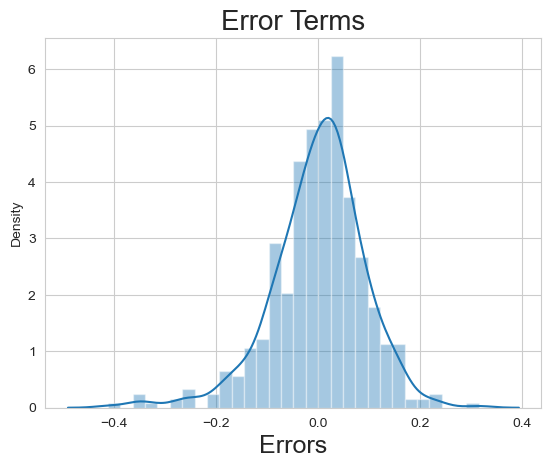

In [256]:
# Plot the histogram of the error terms
sns.distplot(res)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

### Error Terms are Normally Distributed.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [260]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','Rentals']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Rentals
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [262]:
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,Rentals
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [265]:
y_test = df_test.pop('Rentals')
X_test = df_test

In [267]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
184,1.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,1.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.610133,0.153728
299,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0.511964,0.837699,0.334206
221,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,1.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0.817246,0.314298,0.537414


In [269]:
# Creating X_test dataframe by dropping variables from X_test to match with X_train dataset
X_test_sm = X_test_sm.drop(["Mar", "June", "holiday", "Oct", "Wed", "Thu", "Aug", "Tue", "Mon", "May", "Feb", "humidity", "Sun", "Nov", "Dec", "Jan", "July", "spring"], axis = 1)

In [271]:
X_test_sm.head()

,const,Sep,Sat,Light Snow,Mist + Cloudy,summer,winter,Year,workingday,temp,windspeed
184,1.0,0,0,0,1,0,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,1,0,1,1,0.901354,0.153728
299,1.0,0,0,0,1,0,1,0,1,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,1,0.881625,0.339570
152,1.0,0,0,0,0,1,0,0,1,0.817246,0.537414


In [273]:
X_test_sm.shape

(220, 11)

In [275]:
#Predict
y_test_pred = lr_model.predict(X_test_sm)

## Step 8: Model Evaluation
Evaluate R2, Adjusted-R2, plot the graph for actual versus predicted values.

In [278]:
#Evaluate R2
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7961390438459764

In [280]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2 = 1-(1-0.796)*(11-1)/(11-1-1)
print(Adj_r2)

0.7733333333333334


Text(0, 0.5, 'y_test_pred')

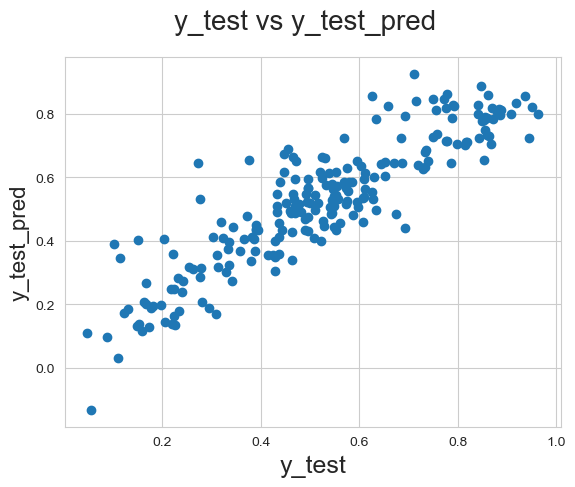

In [282]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# Plot heading 
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
# X-label
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

### We can see that the equation of our best fitted line

## Step 9: Conclusion

### Rentals = $ 0.5499 X temp + 0.2331 X Year + 0.1307 X winter + 0.0974 X Sep + 0.0886 X summer + 0.0675 X Sat + 0.0561 X workingday + -0.08 X MistCloudy + -0.1552 X windspeed + -0.2871	LightSnow $

### Analysis Comparison between Train model and Test:
- Train - $ R^2 $ = 0.835
- Train - Adjusted $ R^2 $ = 0.832
- Test - $ R^2 $ = 0.796
- Test - Adjusted $ R^2 $ = 0.773
- Difference in $ R^2$  between train and test = 3.9%
- Difference in adjusted $ R^2 $ between Train and test = 5.9%
- Since difference between $ R^2 $ and Adusted $ R^2 $ in test case is 2.3% that is less than 5% difference.
- We can conclude that this is the best model

### Analysis on the problem
- We can see that temperature variable is having the highest coefficient 0.5499, which means if the temperature increases by one unit the number of bike rentals increases by 0.5499 units.
- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- We have "Mist + cloudy = -0.08", "windspeed = -0.1552" , "light Snow = -0.2871" variables with negative coefficient.
- The negative coefficient value signifies how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

### Business Goals
- Temperature could be a prime factor for making decision for the Organisation
- We can see demand for bikes was more in 2019 than 2018
- Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals